In [1]:
! pip install polars

In [2]:
import polars as pl
import datetime as dt

df = pl.DataFrame(
    {
        "name": ["Alice Archer", "Ben Brown", "Chloe Cooper", "Daniel Donovan"],
        "birthdate": [
            dt.date(1997, 1, 10),
            dt.date(1985, 2, 15),
            dt.date(1983, 3, 22),
            dt.date(1981, 4, 30),
        ],
        "weight": [57.9, 72.5, 53.6, 83.1],  # (kg)
        "height": [1.56, 1.77, 1.65, 1.75],  # (m)
    }
)

print(df)

shape: (4, 4)
┌────────────────┬────────────┬────────┬────────┐
│ name           ┆ birthdate  ┆ weight ┆ height │
│ ---            ┆ ---        ┆ ---    ┆ ---    │
│ str            ┆ date       ┆ f64    ┆ f64    │
╞════════════════╪════════════╪════════╪════════╡
│ Alice Archer   ┆ 1997-01-10 ┆ 57.9   ┆ 1.56   │
│ Ben Brown      ┆ 1985-02-15 ┆ 72.5   ┆ 1.77   │
│ Chloe Cooper   ┆ 1983-03-22 ┆ 53.6   ┆ 1.65   │
│ Daniel Donovan ┆ 1981-04-30 ┆ 83.1   ┆ 1.75   │
└────────────────┴────────────┴────────┴────────┘


Lazy Loading of the dataset

In [3]:
df = pl.scan_parquet("https://nam04.safelinks.protection.outlook.com/?url=https%3A%2F%2Fdata.ljrobins.com%2Ffiles%2Fpage.parquet&data=05%7C02%7Cbkhwaja%40purdue.edu%7C37993b20219243afa89c08ddc561d36f%7C4130bd397c53419cb1e58758d6d63f21%7C1%7C0%7C638883746144100445%7CUnknown%7CTWFpbGZsb3d8eyJFbXB0eU1hcGkiOnRydWUsIlYiOiIwLjAuMDAwMCIsIlAiOiJXaW4zMiIsIkFOIjoiTWFpbCIsIldUIjoyfQ%3D%3D%7C0%7C%7C%7C&sdata=FaRLG%2F0XFctogRNcYmjtH3lE6D7cNlry7fojrlA0dos%3D&reserved=0")
# print(df)
print(df.explain())
links = pl.scan_parquet("https://nam04.safelinks.protection.outlook.com/?url=https%3A%2F%2Fdata.ljrobins.com%2Ffiles%2Flinkpairs.parquet&data=05%7C02%7Cbkhwaja%40purdue.edu%7C37993b20219243afa89c08ddc561d36f%7C4130bd397c53419cb1e58758d6d63f21%7C1%7C0%7C638883746144130439%7CUnknown%7CTWFpbGZsb3d8eyJFbXB0eU1hcGkiOnRydWUsIlYiOiIwLjAuMDAwMCIsIlAiOiJXaW4zMiIsIkFOIjoiTWFpbCIsIldUIjoyfQ%3D%3D%7C0%7C%7C%7C&sdata=Uk3kXId438qv6o%2FN2Ax4zYlPC00mW6ZD2KXR6qfc9bU%3D&reserved=0")
print(links.explain())

Parquet SCAN [https://nam04.safelinks.protection.outlook.com/?url=https%3A%2F%2Fdata.ljrobins.com%2Ffiles%2Fpage.parquet&data=05%7C02%7Cbkhwaja%40purdue.edu%7C37993b20219243afa89c08ddc561d36f%7C4130bd397c53419cb1e58758d6d63f21%7C1%7C0%7C638883746144100445%7CUnknown%7CTWFpbGZsb3d8eyJFbXB0eU1hcGkiOnRydWUsIlYiOiIwLjAuMDAwMCIsIlAiOiJXaW4zMiIsIkFOIjoiTWFpbCIsIldUIjoyfQ%3D%3D%7C0%7C%7C%7C&sdata=FaRLG%2F0XFctogRNcYmjtH3lE6D7cNlry7fojrlA0dos%3D&reserved=0]
PROJECT */2 COLUMNS
Parquet SCAN [https://nam04.safelinks.protection.outlook.com/?url=https%3A%2F%2Fdata.ljrobins.com%2Ffiles%2Flinkpairs.parquet&data=05%7C02%7Cbkhwaja%40purdue.edu%7C37993b20219243afa89c08ddc561d36f%7C4130bd397c53419cb1e58758d6d63f21%7C1%7C0%7C638883746144130439%7CUnknown%7CTWFpbGZsb3d8eyJFbXB0eU1hcGkiOnRydWUsIlYiOiIwLjAuMDAwMCIsIlAiOiJXaW4zMiIsIkFOIjoiTWFpbCIsIldUIjoyfQ%3D%3D%7C0%7C%7C%7C&sdata=Uk3kXId438qv6o%2FN2Ax4zYlPC00mW6ZD2KXR6qfc9bU%3D&reserved=0]
PROJECT */2 COLUMNS


In [4]:
page = df.collect()
linkPairs = links.collect()

Graph Creation

In [5]:
print(page)
print(linkPairs)
# edge definition -> linkPairs
# node definition -> page_title (get from pages)

class GraphNode:

  def __init__(self, nodeId=0, nodeName="") -> None:
    self.nodeId = nodeId
    self.nodeName = nodeName
    self.edges = []

  def addEdge(self, otherId) -> None:
    self.edges.append(otherId)

  def __str__(self) -> str:
      return f"Graph node {self.nodeId} with the name {self.nodeName} has these connection {self.edges}"


shape: (6_165_305, 2)
┌──────────┬─────────────────────────────────┐
│ page_id  ┆ page_title                      │
│ ---      ┆ ---                             │
│ u32      ┆ str                             │
╞══════════╪═════════════════════════════════╡
│ 12       ┆ Anarchism                       │
│ 39       ┆ Albedo                          │
│ 290      ┆ A                               │
│ 303      ┆ Alabama                         │
│ 305      ┆ Achilles                        │
│ …        ┆ …                               │
│ 77092524 ┆ Ürümqi Solar Farm               │
│ 77092554 ┆ Sílvio Caldas                   │
│ 77092561 ┆ 7th Academy of Country and Wes… │
│ 77092593 ┆ Israeli war crimes in the Isra… │
│ 77092639 ┆ Battle of Huta Brzuska          │
└──────────┴─────────────────────────────────┘
shape: (483_797_701, 2)
┌──────────┬──────────┐
│ pl_from  ┆ pl_to    │
│ ---      ┆ ---      │
│ u32      ┆ u32      │
╞══════════╪══════════╡
│ 12       ┆ 308      │
│ 12       

In [6]:
# create graph dictionary
graph = {}
for row in page.iter_rows():
  id, name = row
  node = GraphNode(nodeId=id, nodeName=name)
  graph.update({id : node})

# create edges
for row in linkPairs.iter_rows():
  plFrom, plTo = row
  node = graph[plFrom]
  node.addEdge(otherId=plTo)


In [7]:
# del page
# del linkPairs

import gc
gc.collect()

0

### Question :

How to effectively create study plan for students using Wikipedia?

Further Questions:
Finding other people that are reseraching the same topics as you

Create an Example User Class

In [7]:
import numpy as np

class User:

  def __init__(self, name="") -> None:
    self.name = name
    self.visitedPages = {} # holds the ids visited and its frequency of times visited
    self.recommendedPages = [] # id of the wiki pages

  def addPage(self, id) -> None:
    if id in self.visitedPages:
      self.visitedPages[id] += 1
    else:
      self.visitedPages.update({id : 1})

  def addRecommendedPapges(self, id) -> None:
    self.recommendedPages.append(id)

  def __str__(self) -> str:
    return f"{self.name} has visited these pages {self.visitedPages}"




In [8]:
# Create a recommendation algorithm for the pages visited by the user
# possible articles in the vicinity of the pages visited by the user -> BFS
user = User(name="Basil Khwaja")
random_idx = np.random.randint(0, len(graph), size=10)
id_keys = list(graph.keys())
for idx in random_idx:
  user.addPage(id_keys[idx])

# print(user)

def recommendArticles(user):

  visitedPages = user.visitedPages
  visitedKeys = list(user.visitedPages.keys())
  print(f"Pages visited by {user.name}")
  for key in visitedKeys:
    node = graph.get(key)
    print(node.nodeName)

  print("\n")

  cluster = {}
  maxDistance = 2 # changes to see different recommendation results

  def bfs(start_id, max_distance) -> None:
      queue = [(start_id, 0)]  # (node_id, distance)

      while queue:
          current_id, distance = queue.pop(0)

          # if current_id not in visitedKeys:
          if current_id in cluster:
            cluster[current_id] += 1
          else:
            cluster.update({current_id : 1})

          if distance < max_distance:
              node = graph.get(current_id)
              if node:
                  for neighbor in node.edges:
                      queue.append((neighbor, distance + 1))

  for key, value in visitedPages.items():
    bfs(key, maxDistance)

  # print(cluster)

  # overlap in graph is more of importance that means there is a shared article of importance
  # sort by value of descencing overlap in graph
  clusterDesc = dict(sorted(cluster.items(), key=lambda item: item[1], reverse=True))
  # print(clusterDesc)

  # Recommend the user these articles to read
  recommendList = list(clusterDesc.keys())
  # print(f"Recommend {user.name} these next articles to read : ")
  # for i in range(5):
  #   node = graph.get(recommendList[i])
  #   print(node.nodeName)

  return recommendList

recommendList = recommendArticles(user)

Pages visited by Basil Khwaja
Sotho deficient verbs
Sonnenspitze
Daniel Henriksson
Anya Reiss
Andrzej Stasiuk
List of Professional Indoor Football League team rosters
Paenochrobactrum
Valencia County News-Bulletin
Sinyang County
Wólka Kańska




In [9]:
!pip install Wikipedia-API

  Preparing metadata (setup.py) ... done
  Created wheel for Wikipedia-API: filename=Wikipedia_API-0.8.1-py3-none-any.whl size=15383 sha256=e77111433255b7df26c7915330909090840b75f6293c3593ce737c49a1a2a837
  Stored in directory: /root/.cache/pip/wheels/0b/0f/39/e8214ec038ccd5aeb8c82b957289f2f3ab2251febeae5c2860
Successfully built Wikipedia-API


In [10]:
import wikipediaapi

def get_wiki_summary(articleTitle):
    wiki = wikipediaapi.Wikipedia(user_agent='StudyPlan (khwajabasil@gmail.com)', language='en')
    page = wiki.page(articleTitle)

    if page.exists():
        return page.summary
    else:
        return f"Could not find a summary for '{articleTitle}' on Wikipedia."

recommendedTitles = []
for i in range(5):
  node = graph.get(recommendList[i])
  recommendedTitles.append(node.nodeName)

print("Summary of Recommended Articles to look into")
print("="*40)
for recommended in recommendedTitles:
  summary = get_wiki_summary(recommended)
  print(f"\n--- {recommended} ---")
  print(summary)
  print("-" * 20)

Summary of Recommended Articles to look into

--- Wayback Machine ---
The Wayback Machine is a digital archive of the World Wide Web founded by Internet Archive, an American nonprofit organization based in San Francisco, California. Launched for public access in 2001, the service allows users to go "back in time" to see how websites looked in the past. Founders Brewster Kahle and Bruce Gilliat developed the Wayback Machine to provide "universal access to all knowledge" by preserving archived copies of defunct web pages.
The Wayback Machine's earliest archives go back at least to 1995, and by the end of 2009, more than 38.2 billion webpages had been saved. As of November 2024, the Wayback Machine has archived more than 916 billion web pages and well over 100 petabytes of data.
--------------------

--- Zadie Smith ---
Zadie Smith  (born Sadie; 25 October 1975) is an English novelist, essayist, and short-story writer. Her debut novel, White Teeth, published in 2000, was an immediate best

In [11]:
# !pip install nx-cugraph-cu11 --extra-index-url https://pypi.nvidia.com
!nvidia-smi
# !pip install nx-cugraph-cu12 --extra-index-url https://pypi.anaconda.org/rapidsai-wheels-nightly/simple
# !pip uninstall cupy-cuda11x cupy-cuda12x
! pip install cupy-cuda12x

Thu Jul 24 22:30:05 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off |   00000000:00:04.0 Off |                    0 |
| N/A   38C    P0             45W /  400W |       0MiB /  40960MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

### Grab the Subgraph of the User

13.3.0
Created a subgraph with 297 nodes and 290 edges.


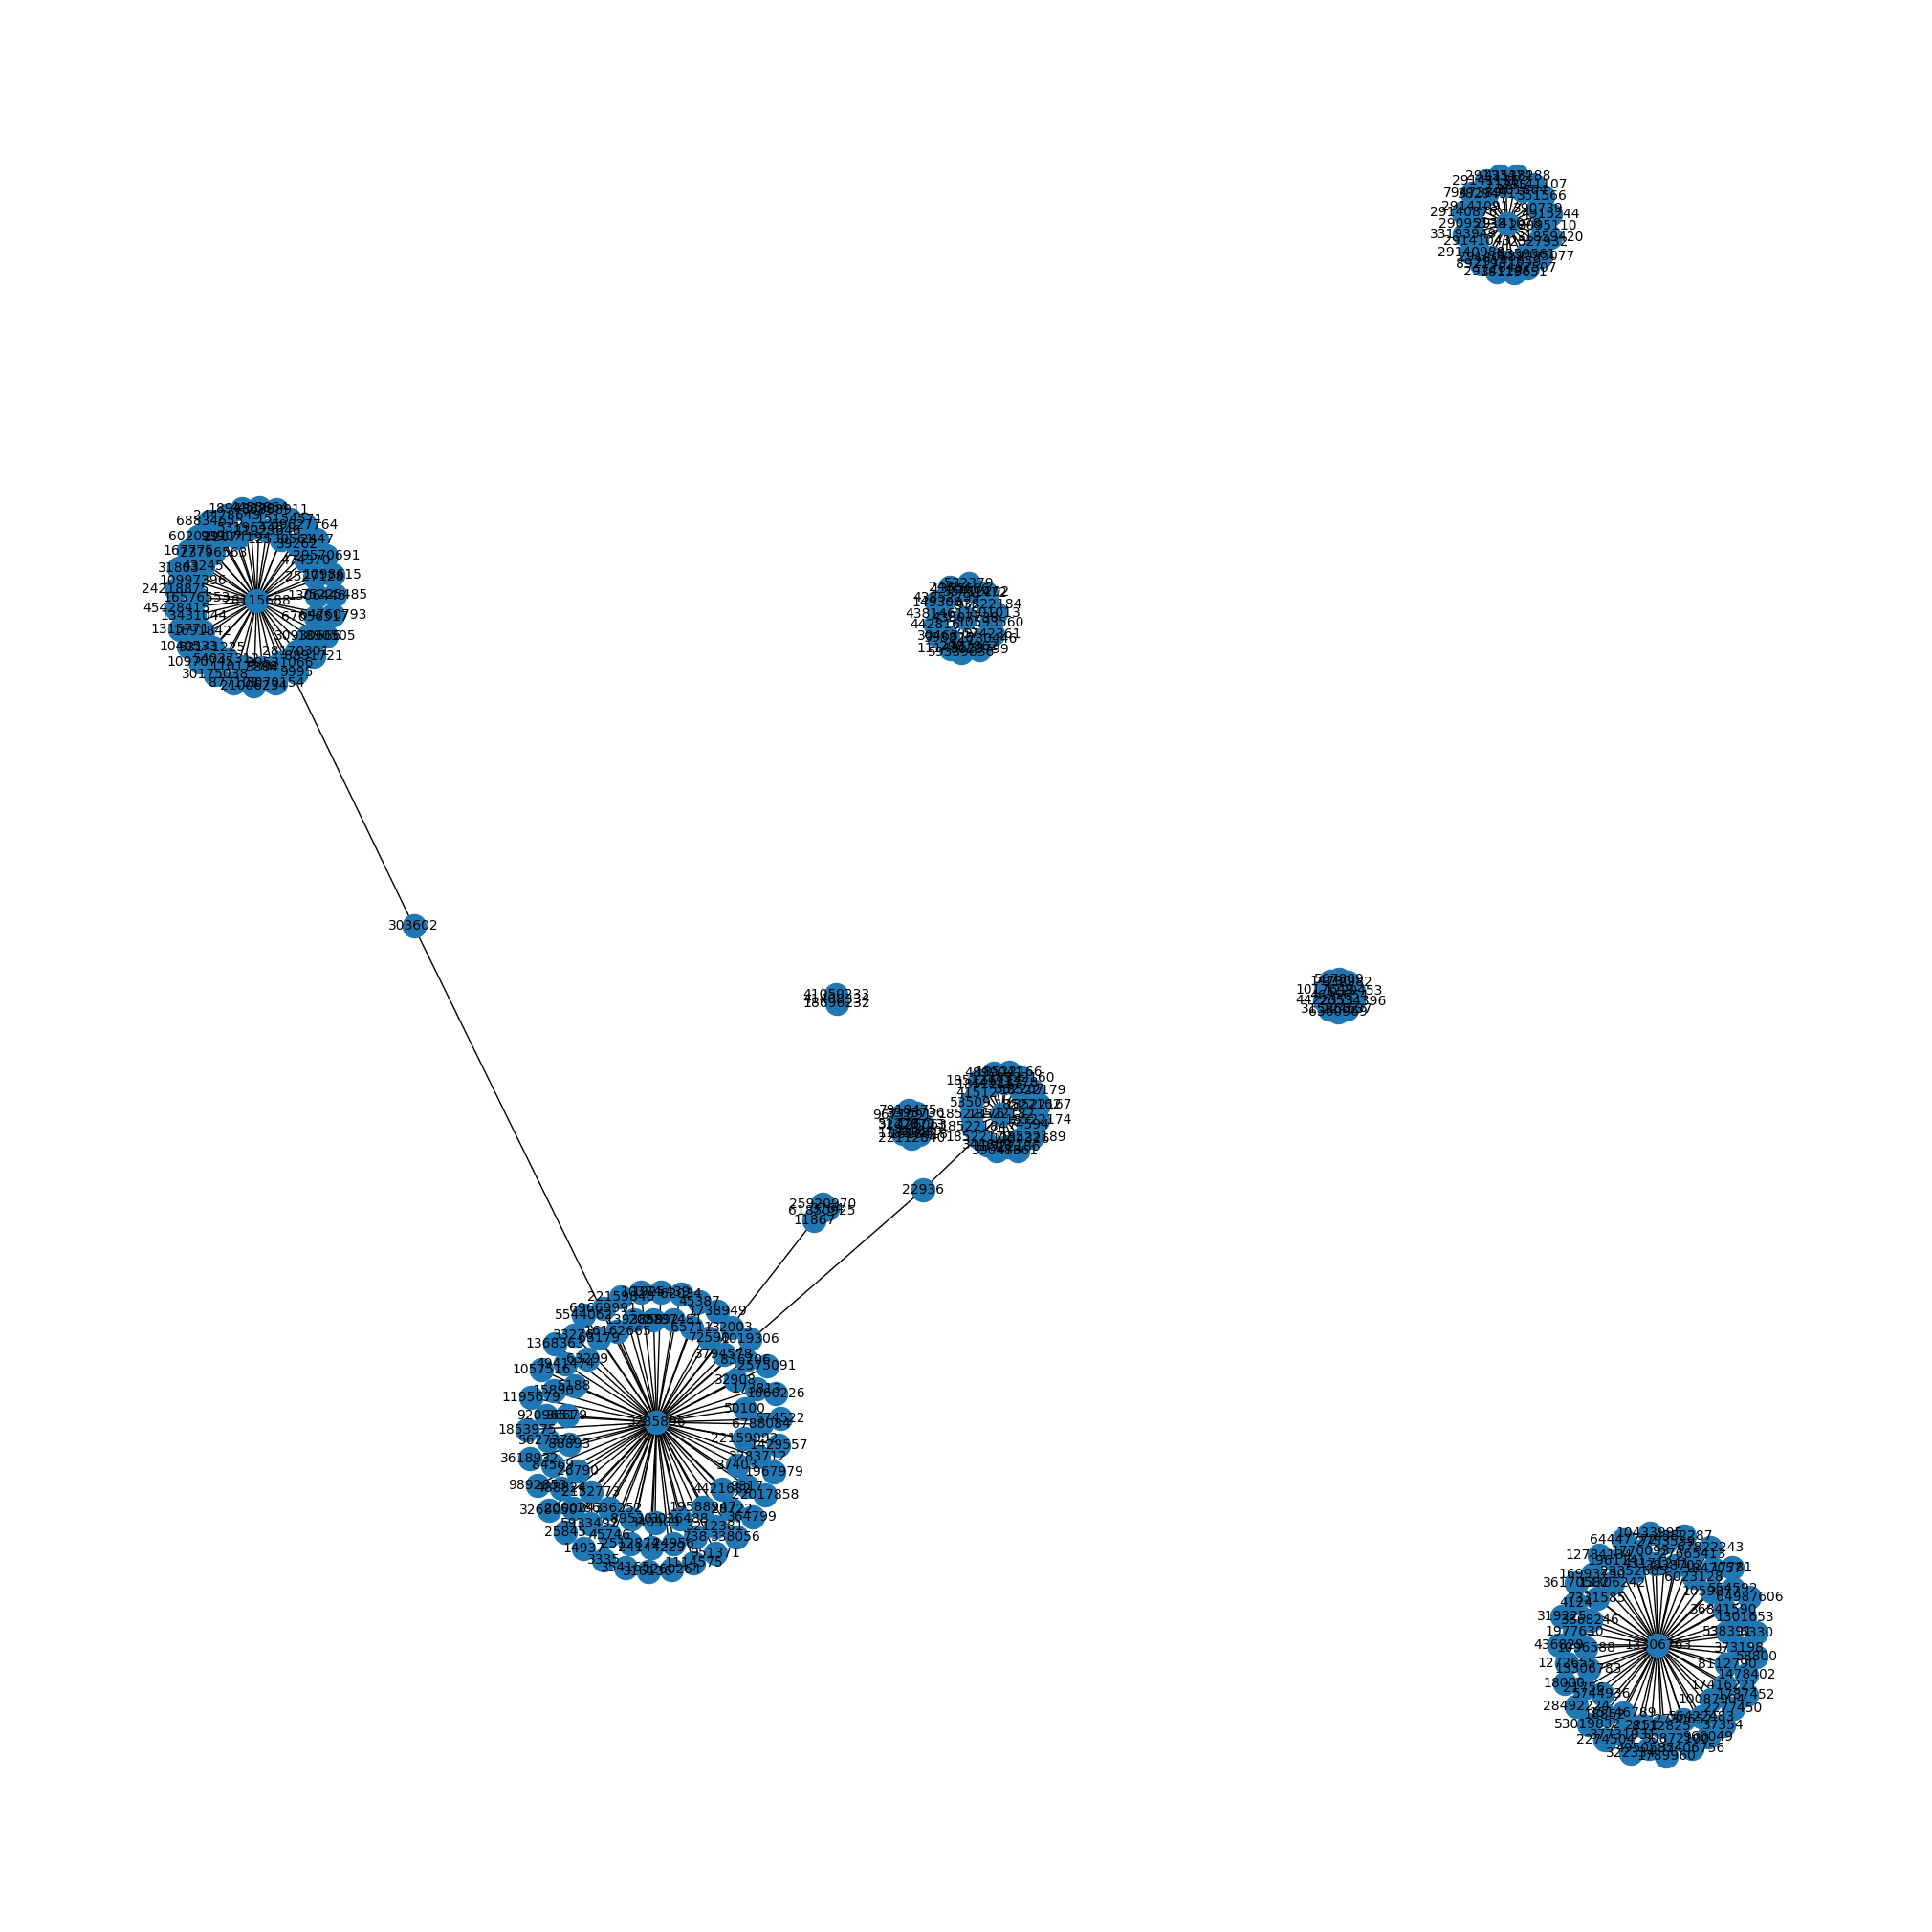

In [12]:
import networkx as nx
import matplotlib.pyplot as plt
import cupy
print(cupy.__version__)
import nx_cugraph as nxcg


# Create a new directed graph for the subgraph
subgraph = nx.Graph()

maxDistance = 1
visitedPages = user.visitedPages

for pageId in visitedPages.keys():
    if pageId in graph:
        node = graph[pageId]
        subgraph.add_node(node.nodeId, name=node.nodeName, label=node.nodeName, type='visited')

nodesToExplore = list(visitedPages.keys())
visitedInBfs = set(visitedPages.keys())

for start_node_id in nodesToExplore:
    queue = [(start_node_id, 0)]

    while queue:
        current_id, distance = queue.pop(0)

        if current_id in graph:
            current_node = graph[current_id]

            if current_id not in subgraph.nodes():
                 subgraph.add_node(current_node.nodeId, name=current_node.nodeName, label=current_node.nodeName, type='neighbor')

            if distance < maxDistance:
                for neighbor_id in current_node.edges:
                    if neighbor_id in graph:
                         neighbor_node = graph[neighbor_id]
                         if neighbor_id not in subgraph.nodes():
                              subgraph.add_node(neighbor_node.nodeId, name=neighbor_node.nodeName, label=neighbor_node.nodeName, type='neighbor')

                         subgraph.add_edge(current_id, neighbor_id)

                         if neighbor_id not in visitedInBfs:
                             visitedInBfs.add(neighbor_id)
                             queue.append((neighbor_id, distance + 1))


print(f"Created a subgraph with {subgraph.number_of_nodes()} nodes and {subgraph.number_of_edges()} edges.")

# convert to cuGraph for better GPU optimization becuase my CPU is cooked :(

nxcgSubgraph = nxcg.from_networkx(subgraph)
fq2Layout = nxcg.forceatlas2_layout(nxcgSubgraph, max_iter=500)
# Fix: Iterate through the dictionary items directly
pos = {int(node_id): (float(coords[0]), float(coords[1])) for node_id, coords in fq2Layout.items()}

# Scale out the plot by increasing figure size
plt.figure(figsize=(20, 20)) # You can adjust the size as needed

nx.draw(subgraph, pos=pos, with_labels=True, node_size=300, font_size=10)
plt.show()

13.3.0
GPU available: True


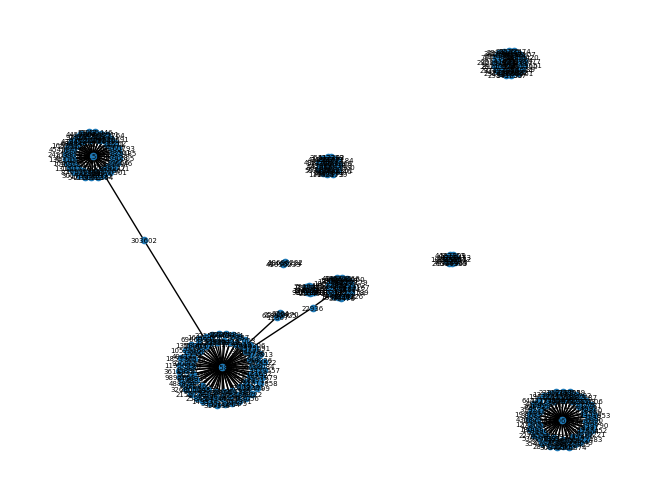

<Figure size 10000x10000 with 0 Axes>

In [13]:
import cupy
print(cupy.__version__)
import nx_cugraph as nxcg

print("GPU available:", cupy.cuda.is_available())
nxcgSubgraph = nxcg.from_networkx(subgraph)
fq2Layout = nxcg.forceatlas2_layout(nxcgSubgraph, max_iter=500)
pos = {int(node_id): (float(coords[0]), float(coords[1])) for node_id, coords in fq2Layout.items()}
nx.draw(subgraph, pos=pos, with_labels=True, node_size=20, font_size=5)
plt.figure(figsize=(100,100))
plt.show()

In [14]:
! pip install pyvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 47.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 76.9 MB/s eta 0:00:00


OMG NEVER LET THE GRAPH GET OUT OF CONTROL
---
Changing the max distance from 2 -> 1 helped render the graph SO much better
---
At most rn form clusters of one because of the amount of connections that exist between the wikepedia pages

In [15]:
from pyvis.network import Network
from google.colab import files

nt = Network(height="750px", width="70%", bgcolor="#222222", font_color="white")
nt.from_nx(subgraph)
# nt.toggle_physics(True)
nt.show_buttons(filter_=['physics'])
nt.save_graph("subgraph.html")
# files.download("graph.html")
# nt.show("graph.html")

### Simulate Multiple Users

Learn about the user more

In [16]:
class Platform:

  def __init__(self) -> None:
     self.users = []

  def addUser(self,user):
    self.users.append(user)

  def __str__(self) -> str:
     return f"{len(self.users)} Users exist on the platform"

In [17]:
platform = Platform()
numberOfUsers = 5
for i in range(0, numberOfUsers):
  user = User(f"User {i}")
  platform.addUser(user)

print(platform)

for user in platform.users:
  random_idx = np.random.randint(0, len(graph), size=10)
  id_keys = list(graph.keys())
  for idx in random_idx:
    user.addPage(id_keys[idx])

  recommnedations = recommendArticles(user)
  # print(recommnedations)

  user.recommendedPages = recommnedations

5 Users exist on the platform
Pages visited by User 0
Radiator King
The Worst Ones
Junior commissioned officer
Pol Hoste
Ralph Watson
Colintraive Hotel
Triple Peel
HNLMS Friesland P842
Ian Hart
Pristimantis muscosus


Pages visited by User 1
Tom Söderberg
Cut to the Quick
Francesco I Moncada, Prince of Paterno
Oconto, Nebraska
Self-serving bias
Vehicle registration plates of Virginia
Karen Ehrenreich
Marcos Bambam
Mayday Troop album
Myat Noe Khin


Pages visited by User 2
French corvette Alysse
Pidgeon
1938 Surinamese general election
Statue of Esther Hobart Morris
Diamidophosphate
Leon Jaworski
Several
Sam Roberts discography
Katarina Zrinska
Kawngkankyun


Pages visited by User 3
Charolais, France
Government Arts College, Karur
76th New York Infantry Regiment
Remote access service
Dante Devil May Cry
Open Learning Agency
Graziano Salvietti
Ramanathpur
Department of Defense Office of Inspector General
Timothy Leemann


Pages visited by User 4
Disc Golf Pro Tour
Dharapuram
North Caroli

Embeddings were cooking my RAM :(

We can more experiments on the data given more time and better resources. My poor collab about to start crying

In [20]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

usersRecommendedTitles = {user.name: user.recommendedPages for user in platform.users}

# Load a pre-trained sentence transformer model
# Ensure the model is on the GPU if available
model = SentenceTransformer('all-MiniLM-L6-v2', device='cuda')

userNames = list(usersRecommendedTitles.keys())
nums = len(userNames)
similarityScores = {}

def convertIdtoNames(idList):
  newTitles = []
  for id in idList:
    node = graph.get(id)
    newTitles.append(node.nodeName)

  return newTitles

for i in range(len(userNames)):
  for j in range(i + 1, len(userNames)):
    user1 = userNames[i]
    user2 = userNames[j]

    id1 = usersRecommendedTitles[user1]
    id2 = usersRecommendedTitles[user2]

    titles1 = convertIdtoNames(id1)
    titles2 = convertIdtoNames(id2)

    if not titles1 or not titles2:
        continue  # Skip if either user has no valid titles

    # Encode titles into embeddings (NO precision arg)
    embeddings = model.encode(titles1, convert_to_numpy=True)
    avg = np.mean(embeddings, axis=0)
    normalized_avg1 = avg / np.linalg.norm(avg)
    embeddings2 = model.encode(titles2, convert_to_numpy=True)
    avg = np.mean(embeddings2, axis=0)
    normalized_avg2 = avg / np.linalg.norm(avg)

    similarity = np.dot(normalized_avg1, normalized_avg2)

    similarityScores[(user1, user2)] = similarity

print("Semantic Similarity Scores Between Users:")
for (user1, user2), score in list(similarityScores.items())[:10]:
  print(f"{user1} and {user2}: {score:.4f}")

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Semantic Similarity Scores Between Users:
User 0 and User 1: 0.9171
User 0 and User 2: 0.9453
User 0 and User 3: 0.9729
User 0 and User 4: 0.9377
User 1 and User 2: 0.9686
User 1 and User 3: 0.9522
User 1 and User 4: 0.9664
User 2 and User 3: 0.9635
User 2 and User 4: 0.9505
User 3 and User 4: 0.9662


In [18]:
! pip install datasketch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.2/89.2 kB 7.7 MB/s eta 0:00:00



MinHash Jaccard Similarity Scores Between Users:
User 0 and User 1: 0.2031
User 0 and User 2: 0.2188
User 0 and User 3: 0.2109
User 0 and User 4: 0.2031
User 1 and User 2: 0.2344
User 1 and User 3: 0.2500
User 1 and User 4: 0.2656
User 2 and User 3: 0.2109
User 2 and User 4: 0.2422
User 3 and User 4: 0.2109


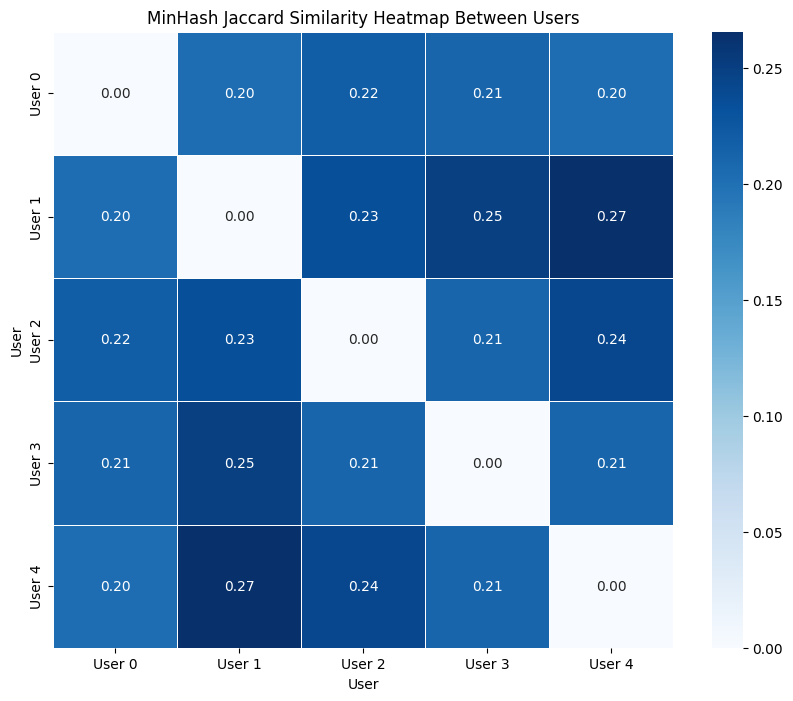

In [21]:
from datasketch import MinHash
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def get_minhash(titles):
    m = MinHash(num_perm=128)
    for title in titles:
        for word in title.lower().split():
            m.update(word.encode('utf8'))
    return m

minhashes = {user.name: get_minhash(convertIdtoNames(usersRecommendedTitles[user.name])) for user in platform.users}

jaccardSimilarityScores = {}
userNames = list(minhashes.keys())
n = len(userNames)

for i in range(n):
    for j in range(i + 1, n):
        user1 = userNames[i]
        user2 = userNames[j]

        minhash1 = minhashes[user1]
        minhash2 = minhashes[user2]

        sim = minhash1.jaccard(minhash2)

        jaccardSimilarityScores[(user1, user2)] = sim

print("\nMinHash Jaccard Similarity Scores Between Users:")
for (user1, user2), score in jaccardSimilarityScores.items():
    print(f"{user1} and {user2}: {score:.4f}")

heatmap_data = pd.DataFrame(0.0, index=userNames, columns=userNames)

for (user1, user2), score in jaccardSimilarityScores.items():
    heatmap_data.loc[user1, user2] = score
    heatmap_data.loc[user2, user1] = score

plt.figure(figsize=(10, 8)) # Adjust figure size as needed
sns.heatmap(heatmap_data, annot=True, cmap='Blues', fmt=".2f", linewidths=.5)
plt.title('MinHash Jaccard Similarity Heatmap Between Users')
plt.xlabel('User')
plt.ylabel('User')
plt.show()

In [ ]:
import gc
gc.collect()

22303